## Explain the XGBOOST model through SHAP


Training Set - R2 Score 0.9892530722441966
Training Set - std R2 Score 0.0017547556432976322
Training Set - RMSE 0.013545230954468085
Training Set - std RMSE Score 0.0010591045728765432
Training Set - MAE 0.010550425990422576
Training Set - std MAE Score 0.0007805229396611405
Test Set - R2 Score 0.8200047780296574
Test Set - std R2 Score 0.06764976803917742
Test Set - RMSE 0.05095484931042496
Test Set - std RMSE Score 0.010360743076343482
Test Set - MAE 0.04049107877095541
Test Set - std MAE Score 0.008135087295253243


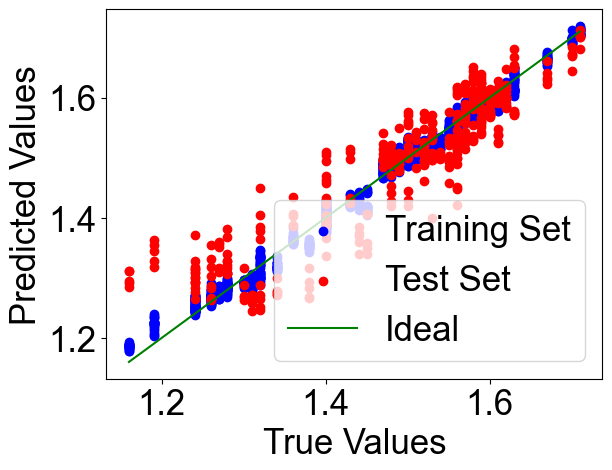

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

# Load data from Excel file
data = pd.read_excel('Total_data.xlsx')


X = data.iloc[:, :5]   
y = data.iloc[:, 5]    
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    max_depth=5,
    learning_rate=0.10,
    n_estimators=210,
    reg_lambda=5,
    reg_alpha=0.01,
    min_child_weight=3,
    subsample=1,
    colsample_bytree=0.8
)

# Define number of repeated cross-validation loops and folds
num_repeats = 5
num_folds = 5

# Initialize lists to store evaluation metrics
all_r2_train = []
all_rmse_train = []
all_mae_train = []
all_r2_test = []
all_rmse_test = []
all_mae_test = []
all_y_train = []
all_y_train_pred = []
all_y_test = []
all_y_test_pred = []
all_x_train = []
all_x_test = []

model_rf_results = []

# K-repeated K-Fold Cross Validator
for i in range(num_repeats):

    
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=i)

    
    for train_index, test_index in cv.split(X, y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = xgb.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)

        all_y_train.append(y_train)
        all_y_train_pred.append(y_train_pred)
        all_y_test.append(y_test)
        all_y_test_pred.append(y_test_pred)
        all_x_train.append(X_train)
        all_x_test.append(X_test)

        # Calculate evaluation metrics
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        all_r2_train.append(r2_train)
        all_rmse_train.append(rmse_train)
        all_mae_train.append(mae_train)
        all_r2_test.append(r2_test)
        all_rmse_test.append(rmse_test)
        all_mae_test.append(mae_test)

# Calculate mean and standard deviation of evaluation metrics
mean_r2_train = np.mean(all_r2_train)
std_r2_train = np.std(all_r2_train)
mean_rmse_train = np.mean(all_rmse_train)
std_rmse_train = np.std(all_rmse_train)
mean_mae_train = np.mean(all_mae_train)
std_mae_train = np.std(all_mae_train)

mean_r2_test = np.mean(all_r2_test)
std_r2_test = np.std(all_r2_test)
mean_rmse_test = np.mean(all_rmse_test)
std_rmse_test = np.std(all_rmse_test)
mean_mae_test = np.mean(all_mae_test)
std_mae_test = np.std(all_mae_test)

print("\nTraining Set - R2 Score", mean_r2_train)
print("Training Set - std R2 Score", std_r2_train)
print("Training Set - RMSE", mean_rmse_train)
print("Training Set - std RMSE Score", std_rmse_train)
print("Training Set - MAE", mean_mae_train)
print("Training Set - std MAE Score", std_mae_train)
print("Test Set - R2 Score", mean_r2_test)
print("Test Set - std R2 Score", std_r2_test)
print("Test Set - RMSE", mean_rmse_test)
print("Test Set - std RMSE Score", std_rmse_test)
print("Test Set - MAE", mean_mae_test)
print("Test Set - std MAE Score", std_mae_test)


# Plot predicted vs true values
y_train_combined = np.concatenate(all_y_train)
y_train_pred_combined = np.concatenate(all_y_train_pred)
y_test_combined = np.concatenate(all_y_test)
y_test_pred_combined = np.concatenate(all_y_test_pred)
x_test_combined = np.concatenate(all_x_test)
x_train_combined = np.concatenate(all_x_train)
plt.scatter(y_train_combined, y_train_pred_combined, color='blue', label='Training Set')
plt.scatter(y_test_combined, y_test_pred_combined, color='red', label='Test Set')
plt.plot([min(y_train_combined), max(y_train_combined)], [min(y_train_combined), max(y_train_combined)], color='green', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [4]:

xgb = XGBRegressor(max_depth=5, learning_rate=0.10, n_estimators=200, reg_lambda=5, reg_alpha=0.01,
min_child_weight=3, subsample=1, colsample_bytree=0.8)
model=xgb.fit(X, y)

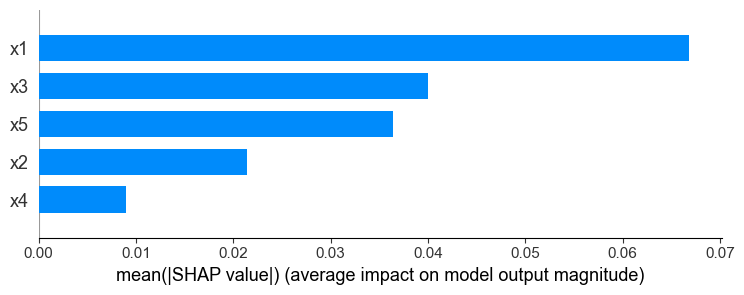

In [17]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

# Initialize JavaScript visualization for SHAP in Jupyter Notebook
shap.initjs()

# Create a model explainer using TreeExplainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the entire dataset
shap_values = explainer.shap_values(X)
expected_value = np.array([explainer.expected_value])

# Convert shap_values into a SHAP Explanation object (optional, for advanced usage)
shap_exp = shap.Explanation(values=shap_values, data=X)

# Generate and display a summary plot of feature importances using bar chart
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar")

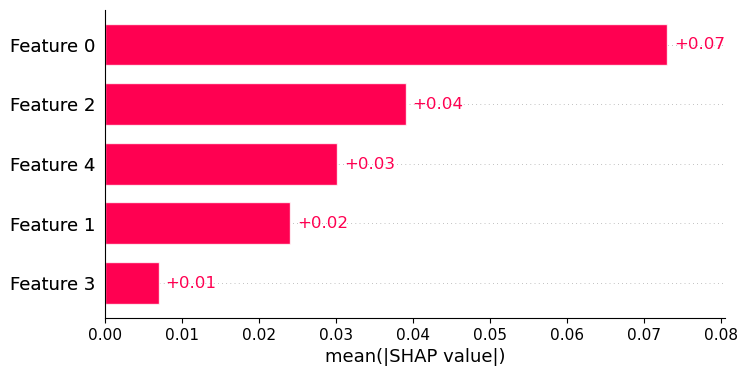

In [ ]:
shap.plots.bar(shap_exp)

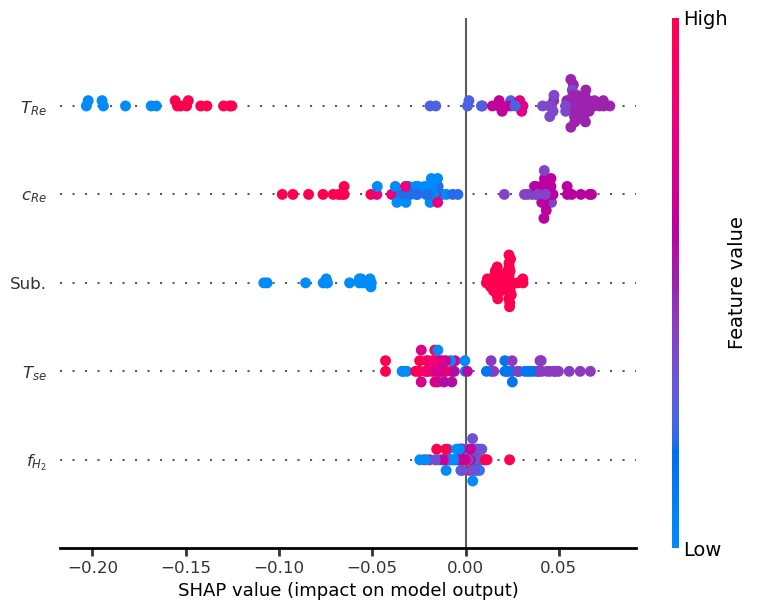

In [ ]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
src_names = ['$T_{Re}$', '$T_{se}$', '$c_{Re}$', '$f_{H_2}$','Sub.']
# 生成Beeswarm图
shap.summary_plot(shap_values, X, feature_names=src_names, plot_size=(8, 6.2), show=False)


fig = plt.gcf()
ax = fig.axes[0]

for child in ax.get_children():
    if isinstance(child, Line2D):
        
        child.set_linewidth(1.5)      
        # child.set_linestyle('-')  
        child.set_alpha(0.8)       
        child.set_color('#333333') 
for child in ax.get_children():
    if isinstance(child, mpl.collections.PathCollection):
        child.set_linewidths(1.5)  
        child.set_sizes([40])      


for spine in ax.spines.values():
    spine.set_linewidth(2)        
plt.tick_params(axis='both', width=2, length=6, labelsize=12)

if len(fig.axes) > 1:
    cb_ax = fig.axes[1]
    cb_ax.tick_params(labelsize=14)
    cb_ax.set_ylabel("Feature value", fontsize=14)

plt.tight_layout()
plt.show()

In [11]:
# Correct force plot call for a single instance
shap.force_plot(expected_value, shap_values, shap_values)


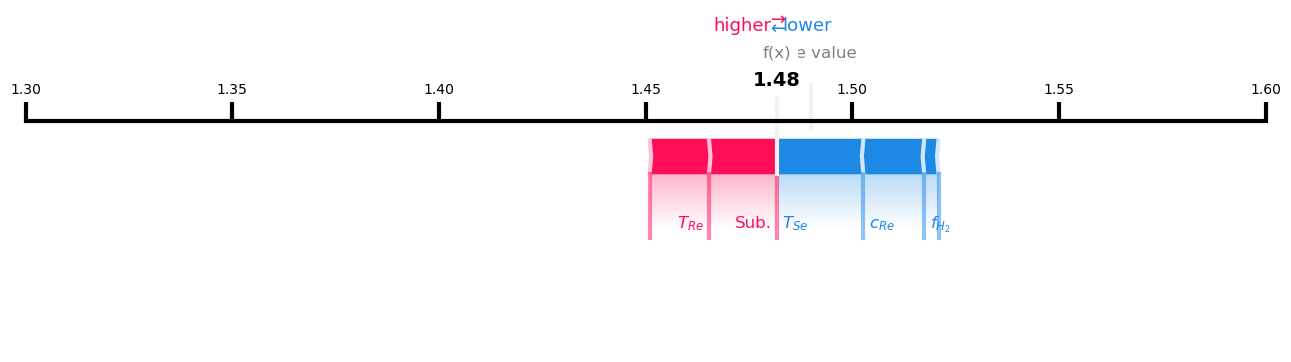

In [ ]:
shap.initjs()
src_names = ['$T_{Re}$', '$T_{Se}$', '$c_{Re}$', '$f_{H_2}$','Sub.']
i=25 # 1,25,88
shap.plots.force(explainer.expected_value, shap_values[i,:], feature_names=src_names , 
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False, figsize=(16, 3), 
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, 
                 contribution_threshold=0.05)
n=3
fig, ax = plt.gcf(), plt.gca()
for line in ax.lines:
    line.set_linewidth(n)

ax.set_xlim(1.30, 1.60)

plt.tick_params(axis='both',width=n,length=14)
ax.spines['top'].set_linewidth(n)

mpl.rcParams['font.size'] =25
mpl.rcParams['font.family'] = 'Arial'
# mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['mathtext.default'] = 'it'

plt.show()
